In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint as pp
%matplotlib inline

In [2]:
bank = pd.read_csv('/users/saurin/desktop/Datacamp/Fraud Protection/bank_data.csv')
bank.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
df = bank.drop(columns=['step', 'customer', 'zipcodeOri', 'merchant', 'zipMerchant'])
df.head()

,age,gender,category,amount,fraud
0,'4','M','es_transportation',4.55,0
1,'2','M','es_transportation',39.68,0
2,'4','F','es_transportation',26.89,0
3,'3','M','es_transportation',17.25,0
4,'5','M','es_transportation',35.72,0


In [5]:
df_transaction = df.groupby('category').mean()
df_transaction

,amount,fraud
category,,
'es_barsandrestaurants',43.461014,0.018829
'es_contents',44.547571,0.000000
'es_fashion',65.666642,0.017973
'es_food',37.070405,0.000000
'es_health',135.621367,0.105126
'es_home',165.670846,0.152064
'es_hotelservices',205.614249,0.314220
'es_hyper',45.970421,0.045917
'es_leisure',288.911303,0.949900


In [6]:
df_age = df.groupby('age').mean()
df_age

,amount,fraud
age,,
'0',46.602896,0.019576
'1',37.530909,0.011853
'2',38.358458,0.012514
'3',37.879718,0.011928
'4',38.201522,0.012933
'5',36.426231,0.010951
'6',36.865624,0.009748
'U',36.627623,0.005942


In [7]:
count = df['age'].value_counts()
count

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

In [8]:
df_fraud = df.loc[df.fraud == 1]
df_fraud

,age,gender,category,amount,fraud
88,'3','M','es_health',44.26,1
89,'3','M','es_health',324.50,1
434,'3','M','es_hotelservices',176.32,1
435,'3','M','es_hotelservices',337.41,1
553,'4','F','es_wellnessandbeauty',220.11,1
...,...,...,...,...,...
593928,'5','M','es_leisure',192.78,1
594025,'5','F','es_wellnessandbeauty',42.37,1
594026,'3','F','es_wellnessandbeauty',521.84,1
594168,'2','F','es_wellnessandbeauty',25.29,1


In [9]:
df_non_fraud = df.loc[df.fraud == 0]
df_non_fraud

,age,gender,category,amount,fraud
0,'4','M','es_transportation',4.55,0
1,'2','M','es_transportation',39.68,0
2,'4','F','es_transportation',26.89,0
3,'3','M','es_transportation',17.25,0
4,'5','M','es_transportation',35.72,0
...,...,...,...,...,...
594638,'3','F','es_transportation',20.53,0
594639,'4','F','es_transportation',50.73,0
594640,'2','F','es_fashion',22.44,0
594641,'5','M','es_transportation',14.46,0


In [11]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

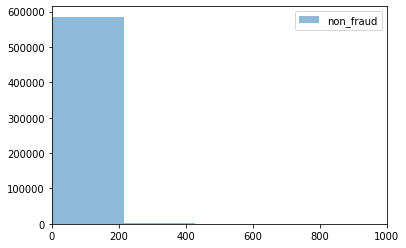

In [12]:
# plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='non_fraud')
plt.legend()

plt.xlim(0,1000)
plt.show()

In [13]:
df['category'].value_counts()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64

##### Scaling the data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
df_1 = df.drop(columns=['gender'])
df_1.head()

,age,category,amount,fraud
0,'4','es_transportation',4.55,0
1,'2','es_transportation',39.68,0
2,'4','es_transportation',26.89,0
3,'3','es_transportation',17.25,0
4,'5','es_transportation',35.72,0


In [14]:
df_2 = pd.get_dummies(df_1, columns=['category'])
df_2

,age,amount,fraud,category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',category_'es_food',category_'es_health',category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,'4',4.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,'2',39.68,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,'4',26.89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,'3',17.25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,'5',35.72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,'3',20.53,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
594639,'4',50.73,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
594640,'2',22.44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
594641,'5',14.46,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
# df_2.age = df_2.age.astype(np.int64)

In [16]:
df_2 = pd.read_csv('/users/saurin/desktop/Datacamp/Fraud Protection/bank_adj.csv')
df_2.head()

,Unnamed: 0,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
X = df_2.values.astype(np.float)
y = df_2.fraud.values

In [32]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 5.00000000e-01, 2.06810025e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.38908182e-04, 6.66666667e-01, 1.62478579e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.77816363e-04, 5.00000000e-01, 7.51345685e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99722184e-01, 1.66666667e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99861092e-01, 1.66666667e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.66666667e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [31]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
# K Means Clustering

In [93]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

In [21]:
kmeans = MiniBatchKMeans(n_clusters = 8, random_state=0)

In [22]:
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [23]:
clustno = range(1,10)
kmeans_1 = [MiniBatchKMeans(n_clusters = i) for i in clustno]

In [24]:
score = [kmeans_1[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_1))]

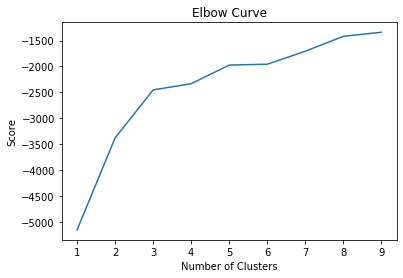

In [25]:
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
# Another method

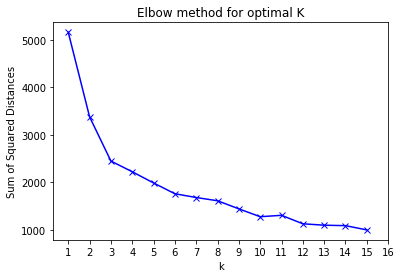

In [28]:
# For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances
# of samples to the nearest cluster centre.

sum_of_squared_distances = []
clustno = range(1,16)
for k in clustno:
    km = MiniBatchKMeans(n_clusters=k, random_state=0)
    km = km.fit(X_scaled)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(clustno, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow method for optimal K')
plt.show()


Now we can see that the optimal number of clusters should probably be at around 3 clusters, as that is where the elbow is in the curve. 
We'll use this as our baseline model, and see how well this does in detecting fraud.

Detecting Outliers

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

X_test_clusters = kmeans.predict(X_test)

# save the cluster centroids
X_test_clusters_centers = kmeans.cluster_centers_

# calculate the distance to the cluster centroids for each point
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# create fraud predictions based on outliers on clusters 
# define the boundary between fraud and non fraud to be at 95% of distance distribution and higher
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0


In [80]:
km_y_pred[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [81]:
print(f"Accuracy Score: {accuracy_score(y_test, km_y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, km_y_pred)}")

Accuracy Score: 0.971256374594344
ROC AUC Score: 0.934936176504411


In [64]:
km_cm = confusion_matrix(y_test, km_y_pred)
km_cm

array([[2043,   56],
       [   6,   52]])

In [84]:
km_y_pred_1 = np.array(dist)
km_y_pred_1[dist >= np.percentile(dist, 93)] = 1
km_y_pred_1[dist < np.percentile(dist, 93)] = 0


In [86]:
km_cm_1 = confusion_matrix(y_test, km_y_pred_1)
km_cm_1

array([[2004,   95],
       [   2,   56]])

In [77]:
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=True,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Normalized confusion matrix


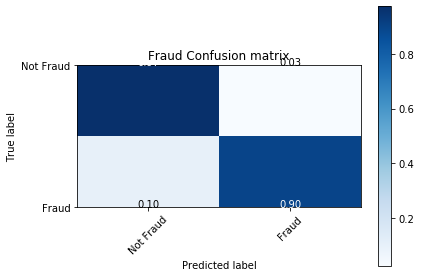

In [78]:
plot_confusion_matrix(km_cm)

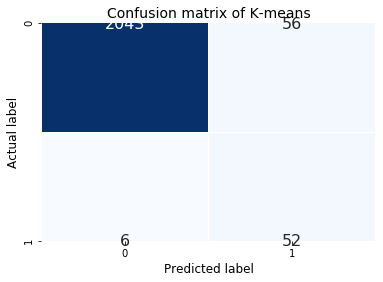

In [75]:
sns.heatmap(km_cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of K-means", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)
plt.show()

In [88]:
# Density based clustering - DBSCAN

In [92]:
db = DBSCAN(eps=0.9, min_samples=10).fit(X_scaled)

pred_labels = db.labels_

n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

In [99]:
print(f'Estimated Clusters: {n_clusters}')
print(f'Homogeneity: {homogeneity_score(y, pred_labels):0.3f}')
print(f'Silhouette Coefficient: {silhouette_score(X_scaled, pred_labels):0.3f}')

Estimated Clusters: 26
Homogeneity: 0.922
Silhouette Coefficient: 0.564


The number of clusters using DBSCAN (26) is much higher than with K-means (3). For fraud detection this is for now OK, as we are only interested in the smallest clusters, since those are considered as abnormal. 
Now let's have a look at those clusters and decide which one to flag as fraud.

In [101]:
# Assesing smallest clusters

counts = np.bincount(pred_labels[pred_labels >= 0])
print(counts)

[3252  105 2714   46  174  119  112   79   52   74   43   24   45   42
   11   19   16   13   10   15   35   10   40   19   11]


In [107]:
# sort the count and take the 3 smallest ones

smallest_clusters = np.argsort(counts)[:3]
print(f'Smallest clusters: \n {smallest_clusters}')

print(f'Their Counts are: \n {counts[smallest_clusters]}')

Smallest clusters: 
 [21 18 24]
Their Counts are: 
 [10 10 11]


In [119]:
# Checking the results

df_results = pd.DataFrame({'clusternr': pred_labels, 'fraud': y})
# print(df_results)

df_results['predicted_fraud'] = np.where((df_results['clusternr'] == 21)| (df_results['clusternr'] == 18) | 
                                                                  (df_results['clusternr'] == 24),1,0)

print(pd.crosstab(df_results['fraud'], df_results['predicted_fraud'], rownames=['Actual Fraud'], 
                  colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6979  10
1               179  21


In [122]:
df_results['predicted_fraud']

0       0
1       0
2       0
3       0
4       0
       ..
7184    1
7185    0
7186    0
7187    1
7188    0
Name: predicted_fraud, Length: 7189, dtype: int64

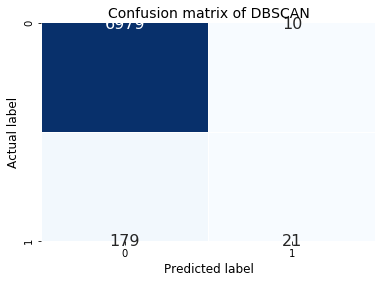

In [121]:
testabc = pd.crosstab(y, df_results['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud'])
sns.heatmap(testabc, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of DBSCAN", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("_cm.png", bbox_inches="tight")
plt.show()

How does this compare to the K-means model? The good thing is: out of all flagged cases (31), roughly 2/3 are actually fraud (21)! Since we only take the three smallest clusters, by definition we flag less cases of fraud, so we catch less but also have less false positives. However, we are missing quite a lot of fraud cases. Increasing the amount of smallest clusters we flag could improve that, at the cost of more false positives of course.